Predicting Outcome using Decision Tree



In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report

# For visualizing the tree
from sklearn import tree
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [379]:
# #Need to clean dataset to be able to be used in decision tree model
df=df1
print('Records prior to cleaning: ',len(df))

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print('Records after cleaning: ',len(df))
print('Some records are dropped to be compatible with with model')


Records prior to cleaning:  51488
Records after cleaning:  49771
Some records are dropped to be compatible with with model


In [380]:
#Split predictors and labels into separate dataframes

X = df.drop('Religion_over_science', axis=1)
Y = df['Religion_over_science']

In [381]:
#Use one hot encoder to transform categorical values

# limit to categorical data using df.select_dtypes()
cat = X.select_dtypes(include=[object])
cat.head(3)

# create a LabelEncoder object and fit it to each feature in X

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = cat.apply(le.fit_transform)

#create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehot_df=pd.DataFrame(onehotlabels)

# merge with main df on key values
X = X.join(onehot_df)
X.head()


,S020,A008,A098,A099,A100,A101,A102,A103,A104,A105,A106,A106B,A106C,A124_02,A124_03,A124_06,A124_07,A124_08,A124_09,A124_12,A124_42,A124_43,A165,A170,B008,E023,E069_01,E218,E220,E248B,E254B,E258B,E259B,E260B,E261B,E262B,F050,H002_01,H002_02,H002_03,H002_04,H002_05,H006_01,I001,I002,X001,X003,X007,X011,X028,X040,X044,X045,X047R_WVS,X049,X051,country,language,occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
2,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,-0.532,-0.794,0.431,-0.903,2.277,1.827,-0.433,-1.870,-1.433,-0.831,-0.648,0.912,-0.278,-0.201,-0.002,-0.809,0.336,-0.392,0.842,-0.290,-1.006,0.424,-1.103,-0.687,-0.471,-0.491,-0.215,-0.035,-0.168,0.096,1.059,-1.033,1.590,-1.149,0.133,0.989,-1.107,0.736,0.244,-1.593,-1.573,Algeria,Algerian dialect,Private business,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,-1.476,-0.532,-0.794,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,-0.831,-0.648,-0.092,-0.718,-0.882,-0.633,0.654,-0.540,-0.392,0.270,0.302,0.112,0.424,-1.103,-0.687,-1.687,-1.690,-1.214,-0.035,-0.168,0.096,1.059,-0.903,1.590,-1.149,-0.888,0.989,2.156,0.736,0.244,-1.593,-1.573,Algeria,Berber,Public institution,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,2014,-1.131,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,1.881,1.259,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,1.007,-0.648,-0.092,-2.479,-0.542,-0.002,0.654,0.336,-0.392,0.842,-0.290,-0.447,0.424,-1.103,0.254,-0.471,-0.491,-0.215,-0.035,-0.522,0.438,1.059,-0.449,-0.764,0.854,0.133,-1.011,-0.019,-0.267,0.244,-1.593,-1.573,Algeria,Algerian dialect,Private business,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [382]:
#Remove categorical fields after encoding them
X = X.drop(("language"),axis=1)
X = X.drop(("occupation"),axis=1)
X = X.drop(("country"),axis=1)
X = X.reset_index(drop=True)
X.head()

,S020,A008,A098,A099,A100,A101,A102,A103,A104,A105,A106,A106B,A106C,A124_02,A124_03,A124_06,A124_07,A124_08,A124_09,A124_12,A124_42,A124_43,A165,A170,B008,E023,E069_01,E218,E220,E248B,E254B,E258B,E259B,E260B,E261B,E262B,F050,H002_01,H002_02,H002_03,H002_04,H002_05,H006_01,I001,I002,X001,X003,X007,X011,X028,X040,X044,X045,X047R_WVS,X049,X051,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
0,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,-0.532,-0.794,0.431,-0.903,2.277,1.827,-0.433,-1.870,-1.433,-0.831,-0.648,0.912,-0.278,-0.201,-0.002,-0.809,0.336,-0.392,0.842,-0.290,-1.006,0.424,-1.103,-0.687,-0.471,-0.491,-0.215,-0.035,-0.168,0.096,1.059,-1.033,1.590,-1.149,0.133,0.989,-1.107,0.736,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,-1.476,-0.532,-0.794,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,-0.831,-0.648,-0.092,-0.718,-0.882,-0.633,0.654,-0.540,-0.392,0.270,0.302,0.112,0.424,-1.103,-0.687,-1.687,-1.690,-1.214,-0.035,-0.168,0.096,1.059,-0.903,1.590,-1.149,-0.888,0.989,2.156,0.736,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,2014,-1.131,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,1.881,1.259,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,1.007,-0.648,-0.092,-2.479,-0.542,-0.002,0.654,0.336,-0.392,0.842,-0.290,-0.447,0.424,-1.103,0.254,-0.471,-0.491,-0.215,-0.035,-0.522,0.438,1.059,-0.449,-0.764,0.854,0.133,-1.011,-0.019,-0.267,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [383]:
#Sample on only a few predictors that have high correlation from correlation matrix above
df_all=X

X=X[["A098","A124_09","A124_42","E069_01","F050","X049"]]

In [384]:
X.head()


,A098,A124_09,A124_42,E069_01,F050,X049
0,-0.831,-0.903,1.827,0.912,0.424,-1.593
1,-0.831,-0.903,1.827,-0.092,0.424,-1.593
2,-0.831,-0.903,1.827,-0.092,0.424,-1.593
3,-0.831,-0.903,-0.547,-0.092,0.424,-1.593
4,-0.831,-0.903,1.827,-0.092,0.424,-1.593


In [385]:
#Assign training, dev and test set to be 80%, 10%, 10% respectively
train_size = round(len(Y)*0.8)
dev_size = round(len(Y)*0.1)
test_size = len(Y) - train_size - dev_size
print(train_size,dev_size,test_size)

39817 4977 4977


In [386]:
# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[train_size+dev_size:], Y[train_size+dev_size:]
dev_data, dev_labels = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size]
train_data, train_labels = X[:train_size], Y[:train_size]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

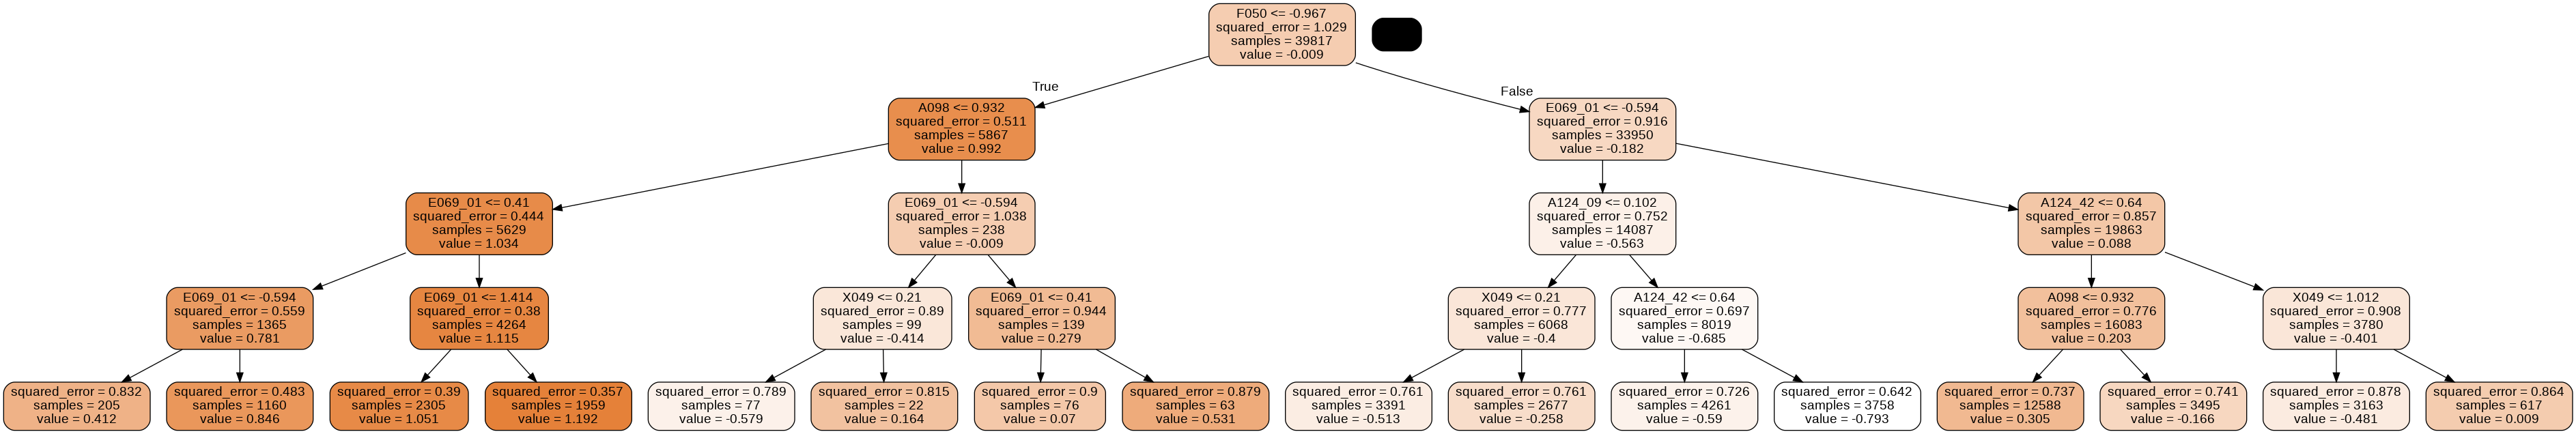

In [387]:
# Train a decision tree classifier
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(train_data, train_labels)

# Output a visualization of it to tree.png
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                     class_names=['acceptable', 'unacceptable'], 
                     feature_names=X.columns,
                     out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Display tree.png here
Image(filename='tree.png')

In [388]:
#Evaluating results

#Predict using dev data
y_pred = clf.predict(dev_data)

#Determine model score
score=clf.score(dev_data, dev_labels)
print('Model Score: ',round(score,4))

#Return the depth of the decision tree.
print('Depth of tree: ',clf.get_depth())

#Return the number of leaves of the decision tree.
print('Number of leaves: ',clf.get_n_leaves())

#Get parameters for this estimator
print('Model parameters: ',clf.get_params())

#Cross validation score
print('Cross Validation Score: ',cross_val_score(clf, dev_data, dev_labels, cv=10))

Model Score:  0.0654
Depth of tree:  4
Number of leaves:  16
Model parameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Cross Validation Score:  [ 0.01380084 -0.08344735 -0.03039046  0.02429385  0.00512779  0.14849742
  0.08071411  0.12279631  0.00391463  0.07061016]


In [389]:
df_all.head()

,S020,A008,A098,A099,A100,A101,A102,A103,A104,A105,A106,A106B,A106C,A124_02,A124_03,A124_06,A124_07,A124_08,A124_09,A124_12,A124_42,A124_43,A165,A170,B008,E023,E069_01,E218,E220,E248B,E254B,E258B,E259B,E260B,E261B,E262B,F050,H002_01,H002_02,H002_03,H002_04,H002_05,H006_01,I001,I002,X001,X003,X007,X011,X028,X040,X044,X045,X047R_WVS,X049,X051,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
0,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,-0.532,-0.794,0.431,-0.903,2.277,1.827,-0.433,-1.870,-1.433,-0.831,-0.648,0.912,-0.278,-0.201,-0.002,-0.809,0.336,-0.392,0.842,-0.290,-1.006,0.424,-1.103,-0.687,-0.471,-0.491,-0.215,-0.035,-0.168,0.096,1.059,-1.033,1.590,-1.149,0.133,0.989,-1.107,0.736,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,2014,0.285,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,-1.476,-0.532,-0.794,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,-0.831,-0.648,-0.092,-0.718,-0.882,-0.633,0.654,-0.540,-0.392,0.270,0.302,0.112,0.424,-1.103,-0.687,-1.687,-1.690,-1.214,-0.035,-0.168,0.096,1.059,-0.903,1.590,-1.149,-0.888,0.989,2.156,0.736,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,2014,-1.131,-0.831,-0.570,-0.494,-0.441,-0.432,-0.394,-0.453,-0.470,-0.348,-0.350,-0.407,-0.445,0.677,1.881,1.259,0.431,-0.903,-0.439,1.827,-0.433,0.535,0.376,1.007,-0.648,-0.092,-2.479,-0.542,-0.002,0.654,0.336,-0.392,0.842,-0.290,-0.447,0.424,-1.103,0.254,-0.471,-0.491,-0.215,-0.035,-0.522,0.438,1.059,-0.449,-0.764,0.854,0.133,-1.011,-0.019,-0.267,0.244,-1.593,-1.573,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [390]:
#Create decision tree with all fields in dataframe as predictors
X=df_all
X=X.astype(np.float32)
X=X.fillna(0)

#Needed to manually enter the column names or else recieved error in decision tree model
X=X[['S020',
 'A008',
 'A098',
 'A099',
 'A100',
 'A101',
 'A102',
 'A103',
 'A104',
 'A105',
 'A106',
 'A106B',
 'A106C',
 'A124_02',
 'A124_03',
 'A124_06',
 'A124_07',
 'A124_08',
 'A124_09',
 'A124_12',
 'A124_42',
 'A124_43',
 'A165',
 'A170',
 'B008',
 'E023',
 'E069_01',
 'E218',
 'E220',
 'E248B',
 'E254B',
 'E258B',
 'E259B',
 'E260B',
 'E261B',
 'E262B',
 'F050',
 'H002_01',
 'H002_02',
 'H002_03',
 'H002_04',
 'H002_05',
 'H006_01',
 'I001',
 'I002',
 'X001',
 'X003',
 'X007',
 'X011',
 'X028',
 'X040',
 'X044',
 'X045',
 'X047R_WVS',
 'X049',
 'X051',0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126]]

X.columns = X.columns.astype(str)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[train_size+dev_size:], Y[train_size+dev_size:]
dev_data, dev_labels = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size]
train_data, train_labels = X[:train_size], Y[:train_size]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

In [391]:
# Train a decision tree classifier
clf = DecisionTreeRegressor()
clf.fit(train_data, train_labels)

#Too large to visualize


DecisionTreeRegressor()

In [374]:
#Evaluating results - model is poor

#Predict using dev data
y_pred = clf.predict(dev_data)

#Determine model score - coefficient of determination of the prediction
score=clf.score(dev_data, dev_labels)
print('Model Score: ',round(score,4))

#Return the depth of the decision tree.
print('Depth of tree: ',clf.get_depth())

#Return the number of leaves of the decision tree.
print('Number of leaves: ',clf.get_n_leaves())

#Get parameters for this estimator
print('Model parameters: ',clf.get_params())

#Cross validation score
print('Cross Validation Score: ',cross_val_score(clf, dev_data, dev_labels, cv=10))


Model Score:  -1.3321
Depth of tree:  37
Number of leaves:  13570
Model parameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Cross Validation Score:  [-0.80878676 -1.1239373  -1.09020918 -1.11739695 -0.76255366 -0.84336496
 -0.73316257 -0.7974372  -1.05769298 -1.04743312]


In [ ]:
#Turning df back to original
df=df1

Discussion: From the results of the two decision trees, the model with only the most important features (high correlation) performed better than the model with all fields. The categorical variables were one-hot encoded to be compatible with the decision tree regressor. Overall, the initial model performance is poor and the feature engineering should continue to yield better results